In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [36]:
dataset_path = '/home/peizhi/Desktop/IELTS_scoring/datasets/raw_datasets/HuggingFace-IELTS-writing-task2-dataset/'

# Load the CSV files into DataFrames
df1 = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
df2 = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

# Concatenate the DataFrames along rows (axis=0)
combined_df = pd.concat([df1, df2], axis=0)

combined_df = combined_df[['prompt', 'essay', 'band']]
combined_df = combined_df.rename(columns={'prompt': 'Question', 'essay': 'Essay', 'band': 'Overall'})
combined_df['Overall'] = combined_df['Overall'].str.replace(r'[\n\r]+', '', regex=True)
combined_df['Overall'] = combined_df['Overall'].str.replace('<4', '3.5', regex=True).astype(np.float32)

print('Unique Scores:', sorted(combined_df['Overall'].unique()))

# Shuffle the DataFrame
shuffled_df = combined_df.sample(frac=1, random_state=42)  # `random_state` is optional but useful for reproducibility

# Reset index to maintain order after shuffling
shuffled_df.reset_index(drop=True, inplace=True)

# Clean the 'Question' column
shuffled_df['Question'] = shuffled_df['Question'].str.replace(r'^\d+', '', regex=True)  # Remove leading numbers
shuffled_df['Question'] = shuffled_df['Question'].str.replace(r'[\n\r]+', '', regex=True)  # Remove \n and \r characters


shuffled_df



Unique Scores: [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]


,Question,Essay,Overall
0,Advertisements are becoming more and more comm...,"In today’s modern society, consumers encounter...",7.0
1,The education of young people is highly priori...,They say education is the key to success.ln m...,6.0
2,Some people think that charity organizations s...,Some people argue that charitable foundations ...,8.0
3,Human activities have negative effects on the ...,There is no doubt that human interventions hav...,6.0
4,Nowadays more and more people want to get thin...,This century is called as a century of technol...,7.0
...,...,...,...
10319,Many people argue that in order to improve edu...,The vast majority of the population deems that...,7.0
10320,Some people say that public sports facilities ...,Some people believe that the sports facilities...,3.5
10321,Some people believe that robots will play an i...,A lot of millennial are of the notion that aut...,5.0
10322,nowadys celebrities are more famous for their...,"with social media becoming more popular, the p...",7.5


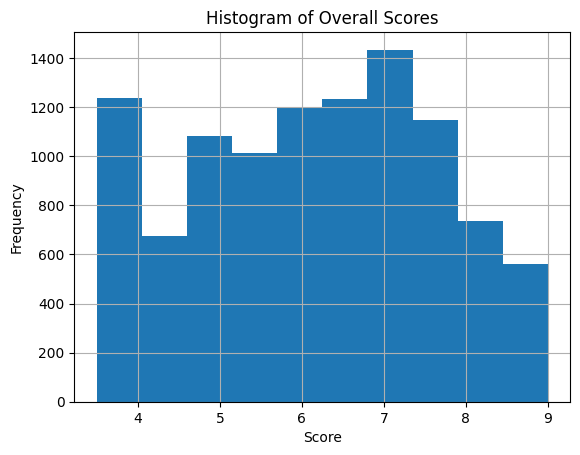

In [22]:
# Plotting the histogram
combined_df['Overall'].hist()  # You can adjust the number of bins based on your data range and distribution

plt.title('Histogram of Overall Scores')  # Title of the histogram
plt.xlabel('Score')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

plt.grid(True)  # Enable grid (optional)
plt.show()  # Display the plot

In [37]:
# form the training and testing sets

split_point = int(len(shuffled_df) * 0.9)

train = shuffled_df.iloc[:split_point]  # First half
test = shuffled_df.iloc[split_point:]  # Second half

print('Train: ', len(train))
print('Test: ', len(test))

test


Train:  9291
Test:  1033


,Question,Essay,Overall
9291,"In some countries, more and more people are be...","In some countries, people often show an increa...",6.5
9292,Some people think that museums should be enjoy...,People have different views about the role and...,6.0
9293,Some people believe that eventually all jobs w...,Many people believe that artificial brilliance...,7.5
9294,Some people think the main purpose of school i...,"Nowadays,many academics are thinking about the...",5.5
9295,as transport and accommodation problems are in...,It is true that the world's largest companies ...,5.5
...,...,...,...
10319,Many people argue that in order to improve edu...,The vast majority of the population deems that...,7.0
10320,Some people say that public sports facilities ...,Some people believe that the sports facilities...,3.5
10321,Some people believe that robots will play an i...,A lot of millennial are of the notion that aut...,5.0
10322,nowadys celebrities are more famous for their...,"with social media becoming more popular, the p...",7.5


In [38]:

save_path = '/home/peizhi/Desktop/IELTS_scoring/datasets/huggingface_task2'

try: os.makedirs(save_path)
except: pass

train.to_csv(os.path.join(save_path, 'train.csv'), index=False)
test.to_csv(os.path.join(save_path, 'test.csv'), index=False)
